<h1>SIR Norovirus Modeling

<h3>Reading in Data

Data found [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2660689/#!po=19.4444)

In [1]:
import pandas as pd

columns = ['Day of Onset','Camp A', 'Camp B', 'Camp C', 'Camp D', 'Camp E', 'Camp F', 'Camp G', 'Unknown', 'Total']
total_populations = {
    'Camp A': 485,
    'Camp B': 721,
    'Camp C': 729,
    'Camp D': 499,
    'Camp E': 735,
    'Camp F': 825,
    'Camp G': 506, 
    'Total': 4500,
}

noro_df = pd.DataFrame(columns=columns)
noro_df = noro_df.append(pd.Series([0,1,1,0,0,0,0,0,0,2], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([1,1,0,1,0,0,0,0,2,4], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([2,0,2,2,1,1,3,0,1,10], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([3,2,7,9,0,2,1,0,1,22], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([4,3,4,2,1,2,2,4,0,18], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([5,0,10,1,2,1,1,2,2,19], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([6,0,12,3,2,2,0,0,1,20], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([7,2,19,14,2,3,3,6,3,52], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([8,3,5,8,2,2,1,1,0,22], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([9,7,10,14,0,2,10,24,2,69], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([10,5,4,3,2,0,16,8,11,49], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([11,3,2,4,1,0,1,1,3,15], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([12,4,1,4,2,1,1,0,2,15], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([13,0,0,1,0,0,0,1,1,3], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([14,0,0,1,0,0,1,0,1,3], index=noro_df.columns), ignore_index=True)
noro_df = noro_df.append(pd.Series([15,0,0,1,0,1,1,0,0,3], index=noro_df.columns), ignore_index=True)

In [2]:
noro_df.astype('int32')

,Day of Onset,Camp A,Camp B,Camp C,Camp D,Camp E,Camp F,Camp G,Unknown,Total
0,0,1,1,0,0,0,0,0,0,2
1,1,1,0,1,0,0,0,0,2,4
2,2,0,2,2,1,1,3,0,1,10
3,3,2,7,9,0,2,1,0,1,22
4,4,3,4,2,1,2,2,4,0,18
5,5,0,10,1,2,1,1,2,2,19
6,6,0,12,3,2,2,0,0,1,20
7,7,2,19,14,2,3,3,6,3,52
8,8,3,5,8,2,2,1,1,0,22
9,9,7,10,14,0,2,10,24,2,69


<h3>Graphing SIR Utilities

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [147]:
def plot_norovirus_SIR(population, title):   
    # Total population, N.
    N = population
    # Initial number of infected and recovered individuals, I0 and R0.
    I0, R0 = 1, 0
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - R0
    # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
    beta, gamma = 1.25, 1/3 
    # A grid of time points (in days)
    t = np.linspace(0, 16, 16)

    # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    fig.patch.set_facecolor('xkcd:salmon')
    fig.suptitle(title)
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (100s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

<h2>Camp A (Actual vs. Predicted)

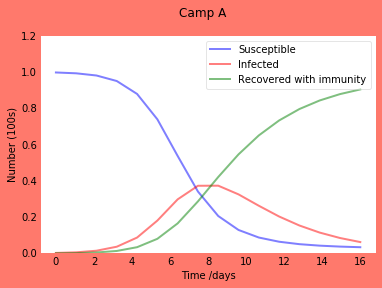

In [148]:
plot_norovirus_SIR(total_populations['Camp A'], 'Camp A')

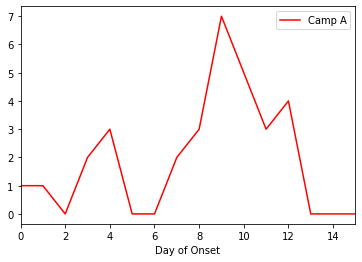

In [149]:
noro_df.plot(kind='line',x='Day of Onset', y='Camp A',color='red')
plt.show()

<h3>Camp B (Predicted vs. Actual)

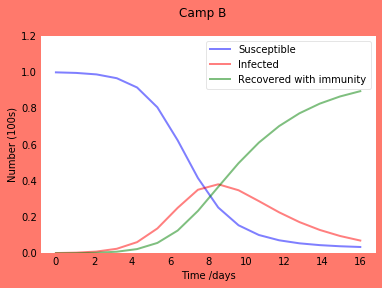

In [151]:
plot_norovirus_SIR(total_populations['Camp B'], 'Camp B')

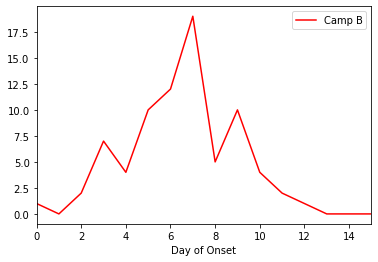

In [152]:
noro_df.plot(kind='line',x='Day of Onset', y='Camp B',color='red')
plt.show()

<h3>Camp C (Predicted vs. Actual)

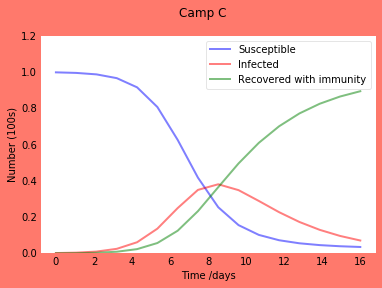

In [153]:
plot_norovirus_SIR(total_populations['Camp C'], 'Camp C')

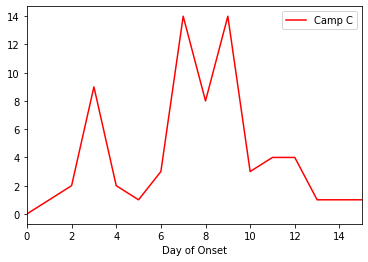

In [154]:
noro_df.plot(kind='line',x='Day of Onset', y='Camp C',color='red')
plt.show()

<h3>Camp D (Predicted vs. Actual)

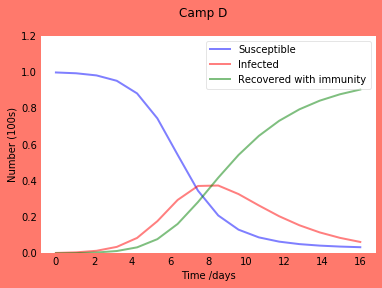

In [155]:
plot_norovirus_SIR(total_populations['Camp D'], 'Camp D')

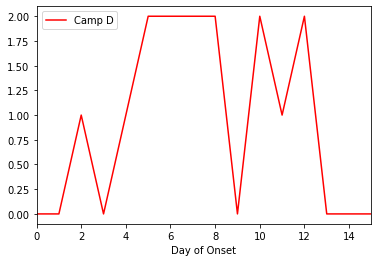

In [157]:
noro_df.plot(kind='line',x='Day of Onset', y='Camp D',color='red')
plt.show()

<h3>Camp E (Predicted vs. Actual)

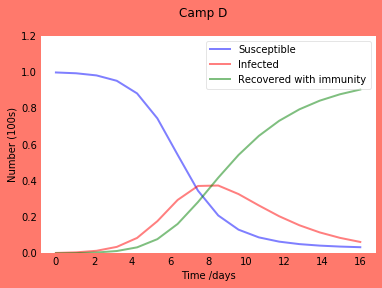

In [158]:
plot_norovirus_SIR(total_populations['Camp D'], 'Camp D')

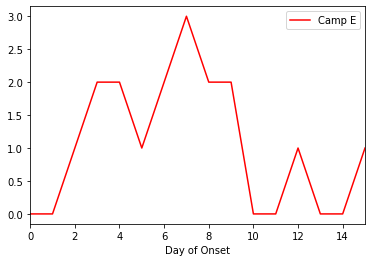

In [159]:
noro_df.plot(kind='line',x='Day of Onset', y='Camp E',color='red')
plt.show()

<h3>Camp F (Predicted vs. Actual)

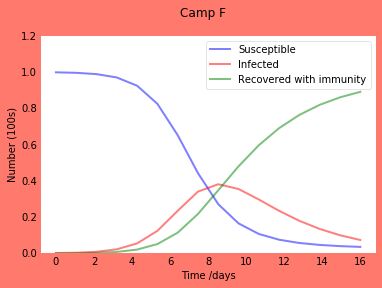

In [161]:
plot_norovirus_SIR(total_populations['Camp F'], 'Camp F')

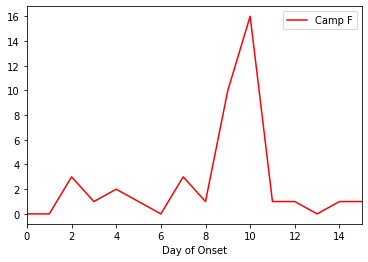

In [163]:
noro_df.plot(kind='line',x='Day of Onset', y='Camp F',color='red')
plt.show()

<h3>Camp G (Predicted vs. Actual)

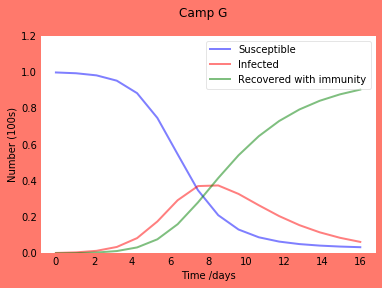

In [164]:
plot_norovirus_SIR(total_populations['Camp G'], 'Camp G')

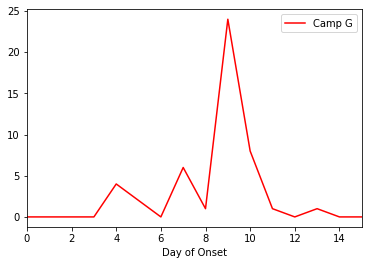

In [165]:
noro_df.plot(kind='line',x='Day of Onset', y='Camp G',color='red')
plt.show()

<h3>Total (Predicted vs. Actual)

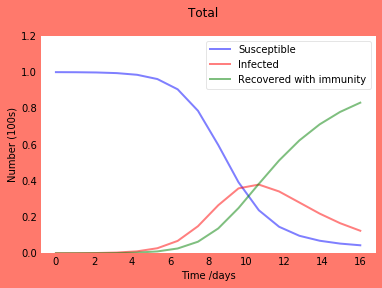

In [166]:
plot_norovirus_SIR(total_populations['Total'], 'Total')

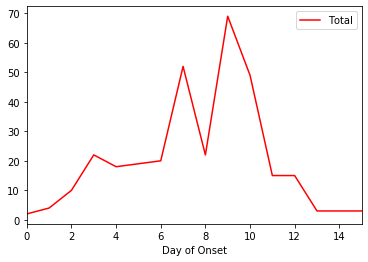

In [167]:
noro_df.plot(kind='line',x='Day of Onset', y='Total',color='red')
plt.show()